In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline

### Task 1
**(a)**   
Load the dataset into Pandas in a Python notebook.

In [36]:
df = pd.read_csv("test_vehicle.csv")
df.head(10)

,cylinders,horsepower,acceleration,CC,Weight,ModelYear,l/100km
0,8,130.0,12.0,5031,1576,2010,15.69
1,8,165.0,11.5,5736,1661,2010,18.83
2,8,150.0,11.0,5212,1546,2010,15.69
3,8,150.0,12.0,4982,1544,2010,17.66
4,8,140.0,10.5,4949,1552,2010,16.62
5,8,198.0,10.0,7031,1953,2010,18.83
6,8,220.0,9.0,7441,1959,2010,20.18
7,8,NaN,8.5,7211,1940,2010,20.18
8,8,225.0,10.0,7457,1991,2010,20.18
9,8,190.0,8.5,6392,1732,2010,18.83


Here we are making sure the data has been loaded in correctly and showing some the dataframe. Here we can see there is some missing values

**(b)**   

<Axes: >

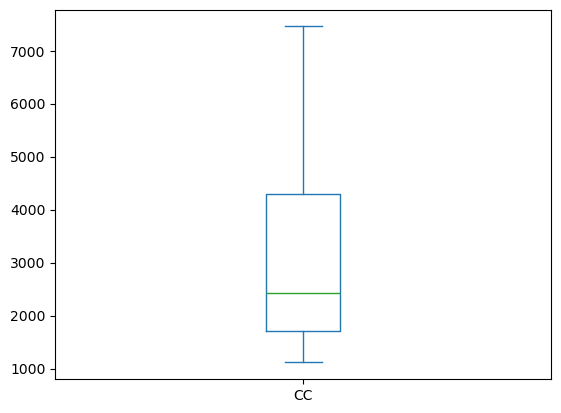

In [39]:
df["CC"].plot(kind='box')

<Axes: >

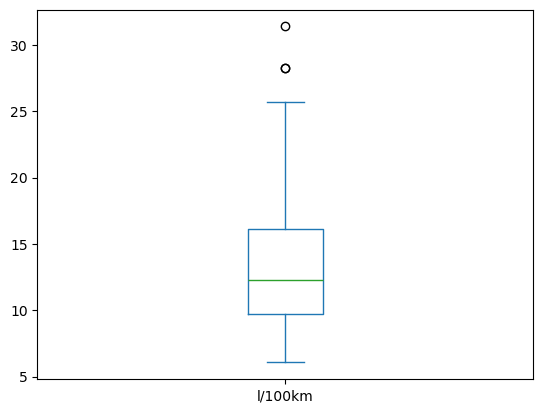

In [40]:
df["l/100km"].plot(kind='box')

I chose to use a box plot because it makes outliers more visible and see if there is any skew. Based of the two box plots, we can see that for the CC feature, we do not have ay outliers whereas for the l/100km, we have some upper outliers

**(c)**   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022')])

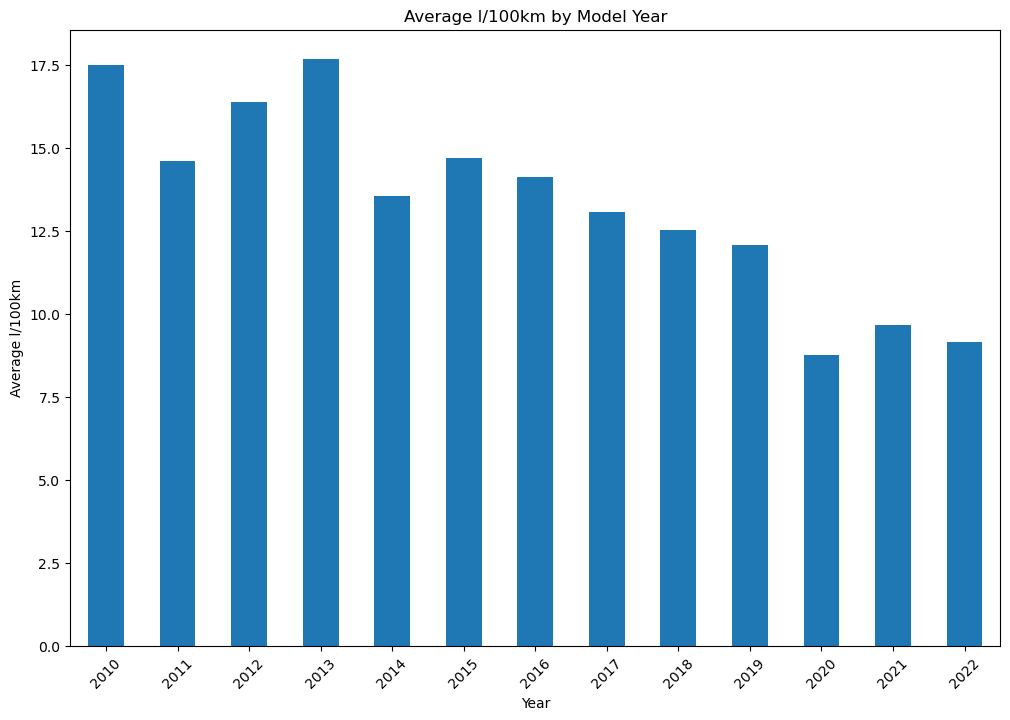

In [43]:
plt.figure(figsize=(12,8))
grouped=df.groupby('ModelYear')['l/100km'].mean()
grouped.plot(kind='bar')
plt.title("Average l/100km by Model Year")
plt.xlabel("Year")
plt.ylabel("Average l/100km")
plt.xticks(rotation=45) 


Here we first group the dataset by the model's year and save it to a new variable. Then, we calculate the mean of the l/100km columns and plot on a bar graph to visualise the graph much better. Here we can see that 2013 has the highest average l/100km whereas 2020 has the lowest average. It also appear we have a negatve trend in that as time goes by the l/100km genreally goes down with some periods of small increase. 

**(d)**   

In [46]:
print("\nCategories which have null values and how many:")
print(df.isnull().sum())

df.interpolate(method ='linear', limit_direction ='forward', inplace=True)
df['horsepower']=df['horsepower'].astype(int)

df.head(10)


Categories which have null values and how many:
cylinders        0
horsepower      26
acceleration     0
CC               0
Weight           0
ModelYear        0
l/100km          0
dtype: int64


,cylinders,horsepower,acceleration,CC,Weight,ModelYear,l/100km
0,8,130,12.0,5031,1576,2010,15.69
1,8,165,11.5,5736,1661,2010,18.83
2,8,150,11.0,5212,1546,2010,15.69
3,8,150,12.0,4982,1544,2010,17.66
4,8,140,10.5,4949,1552,2010,16.62
5,8,198,10.0,7031,1953,2010,18.83
6,8,220,9.0,7441,1959,2010,20.18
7,8,222,8.5,7211,1940,2010,20.18
8,8,225,10.0,7457,1991,2010,20.18
9,8,190,8.5,6392,1732,2010,18.83


Here we can see horsepower has 26 null values whereas none of the other categories have null values. Since horsepower is of type integer, the way i chose to combat the null values is to use interpolation. The reason i chose to use interpolation is because interpolation gives us a number based off previous examples, making it more in line with the previous data than if we chose to use Mean or Median. The problem with the other two is that it could lead to really high or really low data values if there are outliers in horsepower. However, it should be noted that while this will fill in the empty cells, it is not necessarily accurate. We must also cast the column to an integer after interpolation as all data was of type integer pre-interpolation and we must type cast the column post-interpolation as we do get some float values from interpolation 

### Task 2
**(a)**   

In [49]:
correlation = df.corr()
(correlation)

,cylinders,horsepower,acceleration,CC,Weight,ModelYear,l/100km
cylinders,1.000000,0.835360,-0.505419,0.950722,0.896036,-0.348746,0.839282
horsepower,0.835360,1.000000,-0.689017,0.889202,0.854505,-0.417669,0.848391
acceleration,-0.505419,-0.689017,1.000000,-0.543694,-0.417474,0.288137,-0.455761
CC,0.950722,0.889202,-0.543694,1.000000,0.932817,-0.370180,0.866639
Weight,0.896036,0.854505,-0.417474,0.932817,1.000000,-0.306436,0.885202
ModelYear,-0.348746,-0.417669,0.288137,-0.370180,-0.306436,1.000000,-0.557387
l/100km,0.839282,0.848391,-0.455761,0.866639,0.885202,-0.557387,1.000000


I chose to correlation here to see how closely linked the other categories are to 1/100km. Based of this, we can see that CC, Weight, cylinders and horespower should theoretically be the most predictive whereas ModelYear, Acceleration, cylinders and horsepower are the least predictive. Note, correlation does not necessarily imply causation here so while it could be a good indicator, it should not be the sole decision when deciding what makes a category more predictive

**(b)**   


In [52]:

dropped= df.drop('l/100km',axis=1)
x_train, x_test, y_train, y_test = train_test_split(dropped, df['l/100km'], test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Performance with All Features\n")
print("Accuracy:", model.score(x_test, y_test))



Performance with All Features

Accuracy: 0.8854302440711226


**(c)**  


In [54]:
most_predictive= df.drop(['l/100km','acceleration','ModelYear'],axis=1)
least_predictive= df.drop(['l/100km','CC','Weight'],axis=1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(most_predictive, df['l/100km'], test_size=0.3, random_state=42)

model_1 = LinearRegression()
model_1.fit(x_train1, y_train1)
y_pred1 = model_1.predict(x_test1)
print("Performance with Most Predictive Features\n")
print("Accuracy:", model_1.score(x_test1, y_test1))

x_train2, x_test2, y_train2, y_test2 = train_test_split(least_predictive, df['l/100km'], test_size=0.3, random_state=42)

model_2 = LinearRegression()
model_2.fit(x_train2, y_train2)
y_pred2 = model_2.predict(x_test2)
print("\nPerformance with Least Predictive Features\n")
print("Accuracy:", model_2.score(x_test2, y_test2))



Performance with Most Predictive Features

Accuracy: 0.8302842059124306

Performance with Least Predictive Features

Accuracy: 0.8456580076507347


When we use all 6 models for our linear regression model, we get an accuracy of around 88.5%. When we use the categories which should be the most predictive, we get a decrease in accuracy leading to an accuracy of around 83%. On the other hand, if we use the least predictive features, we stil lget a drop from our initial model but we get an accuracy of around 84.6%, which is surprisngly higher than the most_predictive model. This could be that some of the variables are more closely linked with each other so when we drop one, it leads to a performance loss. It could also be that while there is a higher correlation, it could mean that the model is overfitting leading to a worse prediction. 